In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('rose-pine-moon')
%matplotlib inline

Resource: [Stat Trek | ANOVA Tutorial](https://stattrek.com/tutorials/anova-tutorial?tutorial=anova)

## ANOVA

### 1. One-way ANOVA

#### 1.1. Theory

##### 1.1.1. Definition

- **Analysis of variance** refers to a set of techniques for comparing sample statistics (means, proportions, etc.) among two or more groups. 

- If the comparison reveals a statistically significant difference, then we can conclude that the corresponding population parameters in one or more groups are different.

- Analysis of variance can be used when the dependent variable in an experiment is measured on an **interval scale** or a **ratio scale** (not categorical scale). 

##### 1.1.2. Assumptions

Before performing ANOVA, we have to assume the following:
1. **Independence**: Each observation is independent of the others.
2. **Normality**: The data are normally distributed within each group.
3. **Homogeneity of variance**: The variance is equal across all groups.

#### 1.2. Step by Step Process

##### 1.2.1. Nomenclature

- $n:$ Number of values in group.

- $n_j:$ Number of subjects assigned to Group j.

- $k:$ Number of treatment groups.

- $X_{ij}:$ Dependent variable score for the ith subject in Group j.

##### 1.2.2. Mean Scores

Analysis of variance begins by computing a grand mean and group means: 
1. **Grand Mean**:

$$
n = \sum_{j=1}^k n_j \\[5pt]
\bar x = \frac{1}{n} \sum_{j=1}^k \sum_{i=1}^{n_j} (x_{ij})$$

2. **Group Mean**: 

$$ \bar x_{j} = \frac{1}{n_j} \sum_{j=1}^{n_j} x_{ij}$$ 

##### 1.2.3. Sum of Squares

1. **Between groups sum of squares:**
$$ \text{SSB} = \sum_{j=1}^{k} \sum_{i=1}^{n_j} (\bar{x_j} - \bar{x})^2 = \sum_{j=1}^{k}n_j(\bar{x_j} - \bar{x})^2$$

2. **Within-groups sum of squares**: Variation of all scores around their respective group means. 
$$\text{SSW} = \sum_{j=1}^{k} \sum_{i=1}^{n_j} (x_{ij} - \bar{x_j})^2$$

3. **Total sum of squares**: Variation of all scores around the grand mean. 
$$\text{SST} = \sum_{j=1}^{k} \sum_{i=1}^{n_j} (x_{ij} - \bar{x})^2$$


$\text{SST = SSB + SSW}$

##### 1.2.4. Degrees of Freedom

| Sum of Squares | Degrees of freedom |
| --- | --- | 
| Between groups | k - 1 |
| Within groups | n - k |
| Total | n - 1 |

##### 1.2.5. Mean Squares

1. **Within-groups mean square:**
$$\text{MS}_{WG} = \frac{\text{SSW}}{\text{df}_{WG}}$$

2. **Between groups mean square:**
$$\text{MS}_{BG} = \frac{\text{SSB}}{\text{df}_{BG}}$$

##### 1.2.6. Test Statistic

Test Statistic/F-statisitic:
$$F(v_1,v_2) = \frac{\text{Variance between groups}}{\text{Variance within groups}} = 
\frac{\text{MS}_{\text{BG}}}{\text{MS}_{\text{WG}}}$$

Some inference we can make based on the formula:
- When the F ratio is close to one, $\text{MS}_{\text{BG}}$ is approximately equal to $\text{MS}_{\text{WG}}$. This indicates that the independent variable did not affect the dependent variable, so we cannot reject the null hypothesis. 

- When the F ratio is significantly greater than one, $\text{MS}_{\text{BG}}$ is bigger than $\text{MS}_{\text{WG}}$. This indicates that the independent variable did  affect the dependent variable, so we must reject the null hypothesis. 

- The F ratio is a random variable that has an F distribution and so we compute p-value. Comparing it to a significance level helps in rejecting or accepting null hypothesis.

##### 1.2.7. Example

Consider the following of studying effect of three different drug dosage on cholesterol levels.

In [2]:
df = pd.DataFrame({
    'Group 1, 0mg':[210, 240, 270, 270, 300],
    'Group 2, 50mg':[210,240,240,270,270],
    'Group 3, 100mg':[180,210,210,210,240]
})
df

,"Group 1, 0mg","Group 2, 50mg","Group 3, 100mg"
0,210,210,180
1,240,240,210
2,270,240,210
3,270,270,210
4,300,270,240


Tests For normality

In [3]:
data = df.to_numpy()
diag = pd.DataFrame({
    'Mean': np.mean(data, axis=0),
    'Median': np.median(data, axis=0),
    'Range': np.max(data,axis=0) - np.min(data, axis=0),
    'Skew': sc.stats.skew(data, axis=0),
    'kurtosis': sc.stats.kurtosis(data, axis=0)
})
diag.index = df.columns
diag.T

,"Group 1, 0mg","Group 2, 50mg","Group 3, 100mg"
Mean,258.000000,246.000000,210.0
Median,270.000000,240.000000,210.0
Range,90.000000,60.000000,60.0
Skew,-0.271545,-0.343622,0.0
kurtosis,-1.044379,-1.153061,-0.5


- In all three groups, the difference between the mean and median looks small (relative to the range).
- Skewness is close to 0
- Kurtosis is almost in range -1 to 1.

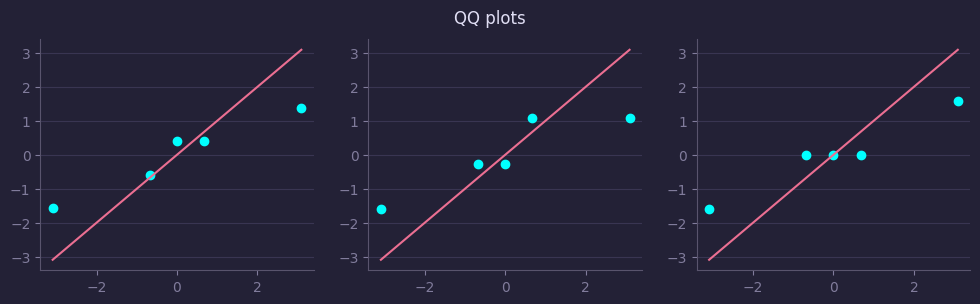

In [4]:
sorted_data = np.sort(data, axis=0)
sorted_data = (sorted_data - np.mean(sorted_data, axis=0))/np.std(sorted_data, axis=0)
norm = sc.stats.norm(0,1)

fig  = plt.figure(figsize=(12,3))
fig.suptitle('QQ plots')
for i in range(3):
    pt = norm.ppf(np.linspace(0.001, 0.999, data.shape[0]))
    ps = np.percentile(sorted_data[:,i], np.linspace(0, 100, data.shape[0]))
    ax = fig.add_subplot(1,3,i+1)
    ax.plot(pt,pt)
    ax.scatter(pt, ps, color='cyan')

Computing Global and Group Means

In [5]:
data = df.to_numpy()

group_mean = np.mean(data, axis=0)
global_mean = np.mean(group_mean)
print(
    f'Mean of groups: {group_mean}',
    f'\nMean of all data: {global_mean:.4f}'
    )

Mean of groups: [258. 246. 210.] 
Mean of all data: 238.0000


Computing sum of squares

In [6]:
# sum of squares between group
ss_btw = np.sum(data.shape[0]*(group_mean - global_mean)**2)

# sum of squares within group
ss_wi = np.sum((data-group_mean)**2)

# total sum of squares
ss_t = np.sum((data-global_mean)**2)
print(
    f'Sum of squares between the groups: {ss_btw:.4f}',
    f'\nSum of squares within the group: {ss_wi:.4f}',
    f'\nTotal sum of squares: {ss_t:.2f}'
)

Sum of squares between the groups: 6240.0000 
Sum of squares within the group: 9000.0000 
Total sum of squares: 15240.00


Computing Mean of sum of squares

In [7]:
df_btw = data.shape[1] - 1
df_wi = (data.shape[0]-1)*data.shape[1] 

mean_ss_btw = ss_btw / df_btw
mean_ss_wi = ss_wi / df_wi

print(
    f'Between-groups Degrees of freedom: {df_btw}',
    f'\nWithin groups degrees of freedom: {df_wi}'
    f'\nMean of Sum of squares between the groups: {mean_ss_btw:.4f}',
    f'\nMean of Sum of squares within the group: {mean_ss_wi:.4f}'
)

Between-groups Degrees of freedom: 2 
Within groups degrees of freedom: 12
Mean of Sum of squares between the groups: 3120.0000 
Mean of Sum of squares within the group: 750.0000


Computing F-statistic and p-value

In [8]:
alpha = 0.05
f = mean_ss_btw / mean_ss_wi
p = 1 - sc.stats.f.cdf(f, df_btw, df_wi)
print(
    f'f-statistic: {f:.2f}'
    f'\np-value: {p:.2e}',
    f'\nSignificance level: {alpha:.2e}'
)

f-statistic: 4.16
p-value: 4.24e-02 
Significance level: 5.00e-02


In [9]:
anova_summary = pd.DataFrame({
    'Source': ['BG', 'WG', 'Total'],
    'SS': [ss_btw, ss_wi, ss_t],
    'df': [df_btw, df_wi, df_btw+df_wi],
    'MSS': [mean_ss_btw, mean_ss_wi, ''],
    'F':[f,'',''],
    'P':[p,'','']
})
anova_summary

,Source,SS,df,MSS,F,P
0,BG,6240.0,2,3120.0,4.16,0.042418
1,WG,9000.0,12,750.0,,
2,Total,15240.0,14,,,


Since the P-value (0.04) in our experiment is smaller than the significance level (0.05), we reject the null hypothesis that drug dosage had no effect on cholesterol level. And we conclude that the mean cholesterol level in at least one treatment group differed significantly from the mean cholesterol level in another group. 

#### 1.3. One Way Anova Class

| | Sum of Squares | Degrees of freedom | Variance | F |
| --- | --- | --- | --- | --- |
| Between | $n_j\sum_{j=1}^{k}(\bar{x_j} - \bar{x})^2$ | k -1 | $\frac{\text{SSB}}{\text{df}_{BG}}$ | $\frac{\text{MS}_{BG}}{\text{MS}_{WG}}$ |
| Within | $\sum_{j=1}^{k} \sum_{i=1}^{n_j} (x_{ij} - \bar{x_j})^2$ | n - k | $\frac{\text{SSW}}{\text{df}_{WG}}$ | |
| Total | $\sum_{j=1}^{k} \sum_{i=1}^{n_j} (x_{ij} - \bar{x})^2$ | n - 1 | | |

In [10]:
class OneWayAnova:
    def __init__(self, data):
        self.data = data
        self.n = self.data.shape[0] * self.data.shape[1]
        self.p = self.data.shape[1]
    
        self.group_mean = np.mean(self.data, axis=0)
        self.global_mean = np.mean(self.data)
        
        self.desc_stats = {}
        self.test_results = {}
        self.anova_results = {'BG': [], 'WG': [], 'Total': []}
        
    def compute_descriptive_stats(self):
        group_median = np.median(self.data, axis=0)
        group_range = np.max(self.data,axis=0) - np.min(self.data, axis=0)
        group_skew = sc.stats.skew(self.data, axis=0)
        group_kurtosis = sc.stats.kurtosis(self.data, axis=0)
        for i in range(3):
            self.desc_stats.update({
                f'Group-{i+1}': [
                    self.group_mean[i], 
                    group_median[i],
                    group_range[i],
                    group_skew[i],
                    group_kurtosis[i]
                    ]
            })
        

    def compute_test_results(self):
        self.z_sores = (self.data - self.group_mean) / np.std(self.data, 0)
        ks_test_results = sc.stats.kstest(self.z_sores, 'norm')
        #shapiro_test_reuslts = sc.stats.shapiro(data)
        for i in range(3):
            self.test_results.update({
                f'Group-{i+1}': [
                    ks_test_results[0][i],
                    ks_test_results[1][i]
                    ]
            })
        
    def compute_ddof(self):
        self.ddof_w = self.n - self.p
        self.ddof_b = self.p  - 1
        self.ddof_t = self.n - 1
        
    def compute_sum_of_squares(self):
        ssw = np.sum((self.data - self.group_mean)**2)
        ssb = np.sum((self.group_mean - self.global_mean)**2, axis=0) * self.data.shape[0]
        sst = np.sum((self.data - self.global_mean)**2)
        return ssw, ssb, sst

    def compute_mean_sum_of_squares(self, ssw, ssb):
        mssw = ssw / self.ddof_w
        mssb = ssb / self.ddof_b
        return mssw, mssb
    
    def compute_F_statistic(self, msw, msb):
        F_stat = msb / msw
        p_val =  1 - sc.stats.f.cdf(F_stat, self.ddof_b, self.ddof_w)
        return F_stat, p_val
    
    def fit(self):
        # checking for normality
        self.compute_descriptive_stats()
        self.compute_test_results()
        # anova analysis
        self.compute_ddof()
        ssw, ssb, sst = self.compute_sum_of_squares()
        mssw, mssb = self.compute_mean_sum_of_squares(ssw, ssb)
        F_stat, p_val = self.compute_F_statistic(mssw, mssb)
        
        self.anova_results['WG'].extend([ssw, self.ddof_w, mssw])
        self.anova_results['BG'].extend([ssb, self.ddof_b,mssb, F_stat, p_val])        
        self.anova_results['Total'].extend([self.ddof_t, sst])
        self.print_summary()
        
        
    def print_summary(self):
        titles = ['Source', 'Mean', 'Median', 'Range', 'Skew', 'Kurtosis']
        self.print_table(self.desc_stats, 'Descriptive Statistics', titles)

        titles = ['Source', 'T-Statistic', 'P-value']
        self.print_table(self.test_results, 'Kolmogorov-Smrinov Test Results', titles)
                
        titles = ['Source', 'SS', 'DF', 'MSS', 'F', 'P']
        self.print_table(self.anova_results, 'ANOVA Summary', titles)
            
    def print_table(self, data_dict, main_title, titles):
        print(f'\n{main_title}')
        temp = 15*(len(titles)) - 5
        print('='*temp)
        print(('{:<15}'*len(titles)).format(*titles))
        print('='*temp)
        for k, v in data_dict.items():
            print(('{:<15}'*(len(v)+1)).format(k, *np.round(v, 6)))

In [11]:
model = OneWayAnova(data)
model.fit()


Descriptive Statistics
Source         Mean           Median         Range          Skew           Kurtosis       
Group-1        258.0          270.0          90.0           -0.271545      -1.044379      
Group-2        246.0          240.0          60.0           -0.343622      -1.153061      
Group-3        210.0          210.0          60.0           0.0            -0.5           

Kolmogorov-Smrinov Test Results
Source         T-Statistic    P-value        
Group-1        0.252557       0.836597       
Group-2        0.257475       0.820726       
Group-3        0.3            0.664          

ANOVA Summary
Source         SS             DF             MSS            F              P              
BG             6240.0         2.0            3120.0         4.16           0.042418       
WG             9000.0         12.0           750.0          
Total          14.0           15240.0        


Conclusion: Since our p-value (0.042418) is less than significance level (0.05) we can reject null hypothesis. We can conclude drug dosage has effect on cholesterol levels.

### 2. Two Factor ANOVA

#### 2.1. Theory

##### 2.1.1. Definition

- *Two Factor Anova* also known as *Full factorial Anova* is a statistical technique used to compare the means of two or more groups across two independent variables (or factors).

- *Independent Variables or Factors* are variables we are observing and manipulating.

- *Dependent Variable* is the variable which we are measuring to see how it is affected by independent variables.

##### 2.1.2. Goals

The goal of two-way ANOVA is to determine:

1. **Main effects**: Whether each independent variable has a significant effect on the dependent variable.

2. **Interaction effects**: Whether the combination of the two independent variables has a significant effect on the dependent variable that's different from the sum of their individual effects.

##### 2.1.3. Assumptions

For two way Anova following assumptions should be met:
1. *Independence of measurement*. 
2. *Homogeneity of variance*.
3. *Normally distributed data*.

#### 2.2. Step By Step Process

##### 2.2.1 Basic Nomencalture

1. $n:$ Total Number of samples.

2. $p:$ Number of groups in factor A.

3. $q:$ Number of groups in factor B.

4. $i:$ Index of groups of factor A.

5. $j:$ Index of groups of factor B.

##### 2.2.2. Mean Scores

1. **Grand Mean**:  

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^p \sum_{j=1}^q \sum_{m=1}^n x_{ijm}$$

2. **Marginal means of Factor A**:

$$ \bar{x_i} = \frac{1}{q} \sum_{j=1}^n \sum_{m=1}^n x_{ijm}$$

3. **Marginal means of Factor B**:

$$ \bar{x_j} = \frac{1}{p} \sum_{i=1}^p \sum_{m=1}^n x_{ijm}$$

4. **Groups Means**

$$ \bar{x_{ij}} = \frac{1}{n} \sum_{m=1}^n x_{ijm}$$

##### 2.2.3. Sum of Squares

1. **Factor A sum of squares:**

$$ \text{SSA} = n\cdot q\cdot \sum_{i=1}^p (\bar{x_i} - \bar{x})^2$$

2. **Factor B sum of squares:**

$$ \text{SSB} = n\cdot p\cdot \sum_{j=1}^q (\bar{x_j} - \bar{x})^2$$

3. **Interaction sum of squares:**

$$ \text{SSAB} = n\cdot \sum_{i=1}^p \sum_{j=1}^q (\bar{x_{ij}} - \bar{x_i} - \bar{x_j})^2$$

4. **Error sum of squares:**

$$ \text{SSE} = \sum_{i=1}^p \sum_{j=1}^q \sum_{m=1}^n  (x_{ijm} - \bar{x_{ij}})^2$$

5. **Total sum of squares:**

$$ \text{SST} = \sum_{i=1}^p \sum_{j=1}^q \sum_{m=1}^n  (x_{ijm} - \bar{x})^2$$

$\text{SST = SSA + SSB + SSAB + SSW}$


##### Degrees of Freedom

|Sum of Squares| Degrees of Freedom |
| --- | --- |
| Factor A | p - 1 |
| Factor B | q - 1 |
| AB interaction | (p-1)(q-1) |
| Error | pq(n-1) |
| Total | npq - 1 |

##### Mean Squares

1. **Factor A mean square:**

$$ MS_A = \frac{SSA}{df_A}$$

2. **Factor B mean square:**

$$ MS_B = \frac{SSA}{df_B}$$

3. **Interaction mean square:**

$$ MS_{AB} = \frac{SSAB}{df_{AB}}$$

4. **Error mean square:**:

$$ MS_{E} = \frac{SSE}{df_{E}}$$

##### Test Statistic

1. **Test statistic of Factor A:**

$$F_A = \frac{MS_A}{MS_E}$$

2. **Test statistic of Factor B:**

$$F_B = \frac{MS_B}{MS_E}$$

3. **Test statistic of Interaction:**

$$F_{AB} = \frac{MS_{AB}}{MS_E}$$

$\text{P-value = 1 - f.Dist.CDF}(\text{F statistic}, df_i, df_E)$

#### Two Way Anova Class

Resource: [DataTab|Two-way Anova](https://datatab.net/tutorial/two-factorial-anova-without-repeated-measures)

Summary:

| |Sum of Squares| Degrees of Freedom | Variance | F|
| --- | --- | --- | --- | --- |
| Total | $SS_{tot} = \sum\sum\sum(x_{mij}-\bar{x})^2$| $df_{tot} = n\cdot p\cdot q - 1$ | $\sigma_{tot}^2 = \frac{SS_{tot}}{df_{tot}}$ | |
| Between | $SS_{btw} = n\cdot \sum\sum(AB_{mij}-\bar{x})^2$ | $df_{btw} =  p\cdot q - 1$ | $\sigma_{btw}^2 = \frac{SS_{btw}}{df_{btw}}$ | |
| Factor A | $SS_{A} = n\cdot q \cdot \sum\sum(A_{i}-\bar{x})^2$ | $df_{A} =  p - 1$ | $\sigma_{A}^2 = \frac{SS_{A}}{df_{A}}$ | $F_A = \frac{\sigma_A^2}{\sigma_{err}^2}$ |
| Factor B | $SS_{B} = n\cdot p \cdot \sum\sum(B_{i}-\bar{x})^2$ | $df_{B} =  q - 1$ | $\sigma_{B}^2 = \frac{SS_{B}}{df_{B}}$ | $F_B = \frac{\sigma_B^2}{\sigma_{err}^2}$ |
| Interaction | $SS_{AB} = SS_{btw} - SS_{A} - SS_{B}$ | $df_{AB} =  (p-1)\cdot (q - 1)$ | $\sigma_{AB}^2 = \frac{SS_{AB}}{df_{AB}}$ | $F_{AB} = \frac{\sigma_{AB}^2}{\sigma_{err}^2}$ |
| Error | $SS_{err} = \sum\sum\sum (x_{mij} - AB_{ij})^2$ | $df_{err} =  (n-1)\cdot p \cdot q$ | $\sigma_{err}^2 = \frac{SS_{err}}{df_{err}}$ | |

Consider the affect of two drugs for male and female on their sleeping hours.

In [12]:
data = np.array([
    [6,4,7,9,3,8,3,5,8,6],
    [4,5,6,7,5,3,5,9,2,3],
    [1,1,1,1,1,0,0,0,0,0]
])
df = pd.DataFrame(data=data.T, columns=['Drug A', 'Drug B', 'Gender'])
data = data[:-1, :]
df

,Drug A,Drug B,Gender
0,6,4,1
1,4,5,1
2,7,6,1
3,9,7,1
4,3,5,1
5,8,3,0
6,3,5,0
7,5,9,0
8,8,2,0
9,6,3,0


In [13]:
data = data.T.reshape(2, 5, 2)
data = np.transpose(data, (0,2, 1))
data

array([[[6, 4, 7, 9, 3],
        [4, 5, 6, 7, 5]],

       [[8, 3, 5, 8, 6],
        [3, 5, 9, 2, 3]]])

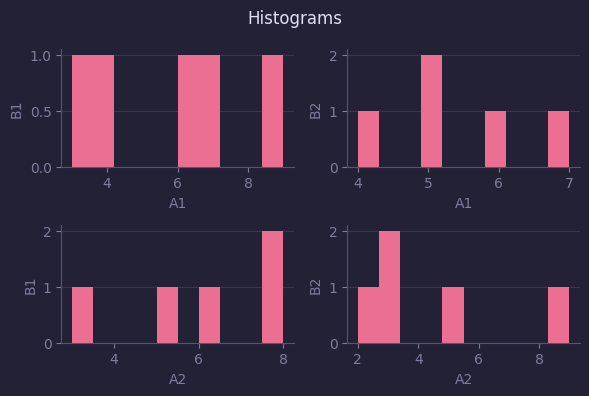

In [14]:
temp = data.reshape(4, 5)
idx = np.stack((np.repeat(np.arange(1,3), 2), np.tile(np.arange(1,3), 2)), 0)
fig = plt.figure(figsize=(6,4), tight_layout=True)
fig.suptitle('Histograms')
for i in range(4):
    ax = fig.add_subplot(2,2, i+1)
    ax.hist(temp[i])

    ax.set_xlabel(f'A{idx[0,i]}')
    ax.set_ylabel(f'B{idx[1, i]}')

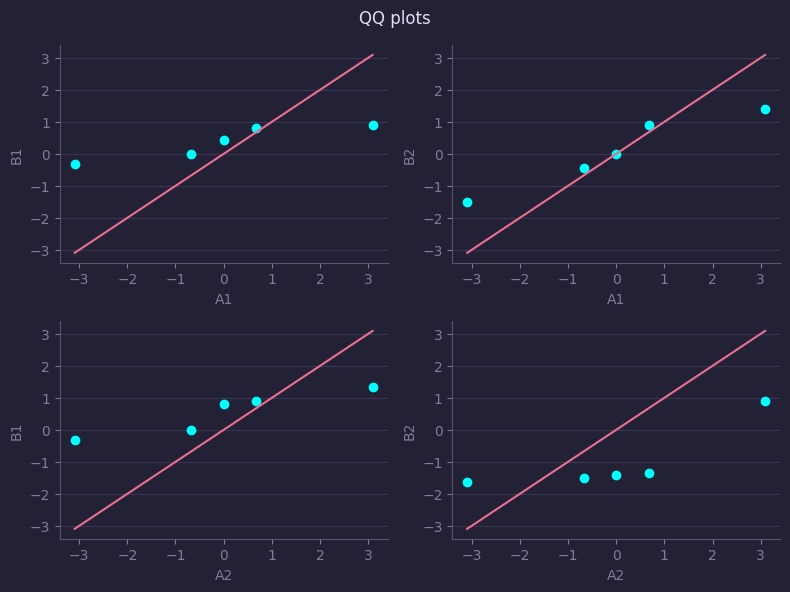

In [15]:
sorted_data = np.sort(temp, axis=1)
sorted_data = (sorted_data - np.mean(sorted_data, axis=0))/np.std(sorted_data, axis=0)
norm = sc.stats.norm(0,1)

fig  = plt.figure(figsize=(8, 6), tight_layout=True)
fig.suptitle('QQ plots')
for i in range(4):
    pt = norm.ppf(np.linspace(0.001, 0.999, sorted_data.shape[1]))
    ps = np.percentile(sorted_data[i], np.linspace(0, 100, sorted_data.shape[1]))
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(pt,pt)
    ax.scatter(pt, ps, color='cyan')
    ax.set_xlabel(f'A{idx[0,i]}')
    ax.set_ylabel(f'B{idx[1, i]}')

In [16]:
class ANOVA:
    def __init__(self, data):
        self.data = data
        
        self.nt = np.prod(self.data.shape)          # total size of data
        self.p = self.data.shape[0]                 # number of group in factor A
        self.q = self.data.shape[1]                 # number of group in factor B
        self.n = self.data.shape[2]                 # number of values per group
        self.anova_data = {
            'Factor A': [],
            'Factor B': [],
            'Factor AB': [],
            'Between': [],
            'Error': [],
            'Total': [],   
        }
        
    def compute_descriptive_stats(self):
        median = np.median(self.data,axis=-1).flatten()
        range_ = (np.max(self.data, -1) - np.min(self.data, -1)).flatten()
        skew = sc.stats.skew(self.data, -1).flatten()
        kurt = sc.stats.kurtosis(self.data, -1).flatten()
        
        self.desc_stats = {
            'Mean': self.mean_data['mean_AB'].flatten(),
            'Median': median,
            'Range': range_,
            'Skew':skew,
            'Kurt':kurt
        }

    def compute_means(self):
        self.mean_data = {
            'mean_AB': np.mean(data, axis=-1),      # mean of indivual groups
            'mean_A': np.mean(data, axis=(0,2)),    # mean of factor A
            'mean_B': np.mean(data, axis=(1,2)),    # total of factor B
            'mean_T': np.mean(data)                 # global mean
        }
        
    def compute_sum_of_squares(self):
        ss_tot = np.sum((self.data - self.mean_data['mean_T'])**2)
        ss_btw = self.n * np.sum((self.mean_data['mean_AB']- self.mean_data['mean_T'])**2)
        ss_a = self.n * self.q * np.sum((self.mean_data['mean_A'] - self.mean_data['mean_T'])**2)
        ss_b = self.n * self.p * np.sum((self.mean_data['mean_B'] - self.mean_data['mean_T'])**2)
        ss_ab = ss_btw - ss_a - ss_b
        ss_err = np.sum((self.data - self.mean_data['mean_AB'].reshape(self.p, self.q, 1))**2)
        
        ss_data = [ss_a, ss_b, ss_ab, ss_btw, ss_err, ss_tot]
        for i, k in zip(ss_data, self.anova_data.keys()):
            self.anova_data[k].append(i)

        
    def compute_ddof(self):
        ddof_data = [
            self.p - 1, 
            self.q - 1,
            (self.p - 1)*(self.q - 1),
            self.p * self.q - 1,
            (self.n - 1)*self.p*self.q,
            self.n * self.p * self.q - 1
        ]
        for i, k in zip(ddof_data, self.anova_data.keys()):
            self.anova_data[k].append(i)
       

    def compute_mss(self):
        for k, v in self.anova_data.items():
            self.anova_data[k].append(v[0]/v[1])
    
    def compute_test_stats(self):
        i = 0
        for k, v in self.anova_data.items():
            if i < 3:
                f = v[-1] / self.anova_data['Error'][-1]
                p_val = 1- sc.stats.f.cdf(f, v[1], self.anova_data['Error'][1])
                self.anova_data[k].extend([f, p_val])           
            i +=1
            
    def fit(self):
        self.compute_means()
        self.compute_descriptive_stats()
        self.compute_sum_of_squares()
        self.compute_ddof()
        self.compute_mss()
        self.compute_test_stats()
        self.print_summary()
    
    def print_summary(self):
        title = ['']
        for i in range(self.p):
            for j in range(self.q):
                title.append(f'A{i}B{j}')
        self.print_table(self.desc_stats, 'Descriptive Statistics', title)
    
        
        title = ['', 'SS', 'DF', 'MSS', 'F-Statistic', 'P-value'] 
        self.print_table(self.anova_data, 'Two way ANOVA', title)
        
    def print_table(self, data_dict, main_title, title):
        print(f'\n{main_title}')
        temp = 15*(len(title)) - 5
        print('='*temp)
        print(('{:<15}'*len(title)).format(*title))
        print('='*temp)
        for k, v in data_dict.items():
            print(('{:<15}'*(len(v) + 1)).format(k, *np.round(v, 6)))   
            
model = ANOVA(data)
model.fit()



Descriptive Statistics
               A0B0           A0B1           A1B0           A1B1           
Mean           5.8            5.4            6.0            4.4            
Median         6.0            5.0            6.0            3.0            
Range          6              3              5              7              
Skew           0.138023       0.271545       -0.351364      1.00388        
Kurt           -1.279317      -1.044379      -1.240741      -0.489645      

Two way ANOVA
               SS             DF             MSS            F-Statistic    P-value        
Factor A       5.0            1.0            5.0            1.036269       0.323838       
Factor B       0.8            1.0            0.8            0.165803       0.689265       
Factor AB      1.8            1.0            1.8            0.373057       0.549922       
Between        7.6            3.0            2.533333       
Error          77.2           16.0           4.825          
Total          84.8

Conclusion:
- On basis of p-value of Factor A and Factor B we cannot reject null hypothesis and claim anything.
- Also, based on p-value of factor AB we cannot reject null hyptothesis.